In [1]:
# Importing packages

import numpy as np
from scipy.optimize import curve_fit
import pandas
from uncertainties import ufloat
from uncertainties import umath
from uncertainties import unumpy as unp
import cmath
import matplotlib.pyplot as plt

# Setting plot parameters

plt.rcParams["figure.dpi"] = 300
plt.rcParams["figure.figsize"] = (15,10)
plt.rc('font', family = 'serif', serif = 'cmr10') 
plt.rcParams.update({'font.size': 22})
plt.rcParams['axes.unicode_minus'] = False
plt.rcParams['mathtext.fontset'] = 'stix'

In [2]:
# Importing experimental and calibration data

df1 = pandas.read_csv('BrewstersAnglePP.csv', sep=';')
# print(df1)
IncidentPP = df1['Incident Angle (degrees)']
VoltagePP = df1['Voltage From LDR Circuit (Volts)']
DeviationPP = df1['Standard Deviation of Voltage (Volts)']

df2 = pandas.read_csv('BrewstersAngleSP.csv', sep=';')
# print(df2)
IncidentSP = df2['Incident Angle (degrees)']
VoltageSP = df2['Voltage From LDR Circuit (Volts)']
DeviationSP = df2['Standard Deviation of Voltage (Volts)']

df3 = pandas.read_csv('CalibBlue.csv', sep=';')
# print(df3)
DetectorAngleCalibBlue = df3['Angular Position of Detector (degrees)']
VoltageCalibBlue = df3['Voltage From LDR Circuit (Volts)']
DeviationCalibBlue = df3['Standard Deviation of Voltage (Volts)']

df4 = pandas.read_csv('CalibRed.csv', sep=';')
# print(df4)
DetectorAngleCalibBlue = df4['Angular Position of Detector (degrees)']
VoltageCalibBlue = df4['Voltage From LDR Circuit (Volts)']
DeviationCalibBlue = df4['Standard Deviation of Voltage (Volts)']

df5 = pandas.read_csv('SurfacePlasmonBlue_1.csv', sep=';')
# print(df5)
AngleBlue1 = df5['External Angle (degrees)']
VoltageBlue1 = df5['Voltage From LDR Circuit (Volts)']
DeviationBlue1 = df5['Standard Deviation of Voltage (Volts)']

df6 = pandas.read_csv('SurfacePlasmonRed_1.csv', sep=';')
# print(df6)
AngleRed1 = df6['External Angle (degrees)']
VoltageRed1 = df6['Voltage From LDR Circuit (Volts)']
DeviationRed1 = df6['Standard Deviation of Voltage (Volts)']

df7 = pandas.read_csv('SurfacePlasmonBlue_2.csv', sep=';')
# print(df7)
AngleBlue2 = df7['External Angle (degrees)']
VoltageBlue2 = df7['Voltage From LDR Circuit (Volts)']
DeviationBlue2 = df7['Standard Deviation of Voltage (Volts)']

df8 = pandas.read_csv('SurfacePlasmonRed_2.csv', sep=';')
# print(df8)
AngleRed2 = df8['External Angle (degrees)']
VoltageRed2 = df8['Voltage From LDR Circuit (Volts)']
DeviationRed2 = df8['Standard Deviation of Voltage (Volts)']

df9 = pandas.read_csv('SurfacePlasmonBlue_3.csv', sep=';')
# print(df9)
AngleBlue3 = df9['External Angle (degrees)']
VoltageBlue3 = df9['Voltage From LDR Circuit (Volts)']
DeviationBlue3 = df9['Standard Deviation of Voltage (Volts)']

df10 = pandas.read_csv('SurfacePlasmonRed_3.csv', sep=';')
# print(df10)
AngleRed3 = df10['External Angle (degrees)']
VoltageRed3 = df10['Voltage From LDR Circuit (Volts)']
DeviationRed3 = df10['Standard Deviation of Voltage (Volts)']

df11 = pandas.read_csv('SurfacePlasmonBlue_4.csv', sep=';')
# print(df11)
AngleBlue4 = df11['External Angle (degrees)']
VoltageBlue4 = df11['Voltage From LDR Circuit (Volts)']
DeviationBlue4 = df11['Standard Deviation of Voltage (Volts)']

df12 = pandas.read_csv('SurfacePlasmonRed_4.csv', sep=';')
# print(df12)
AngleRed4 = df12['External Angle (degrees)']
VoltageRed4 = df12['Voltage From LDR Circuit (Volts)']
DeviationRed4 = df12['Standard Deviation of Voltage (Volts)']

df13 = pandas.read_csv('SurfacePlasmonBlue_5.csv', sep=';')
# print(df13)
AngleBlue5 = df13['External Angle (degrees)']
VoltageBlue5 = df13['Voltage From LDR Circuit (Volts)']
DeviationBlue5 = df13['Standard Deviation of Voltage (Volts)']

df14 = pandas.read_csv('SurfacePlasmonRed_5.csv', sep=';')
# print(df14)
AngleRed5 = df14['External Angle (degrees)']
VoltageRed5 = df14['Voltage From LDR Circuit (Volts)']
DeviationRed5 = df14['Standard Deviation of Voltage (Volts)']

Brewster's Angle

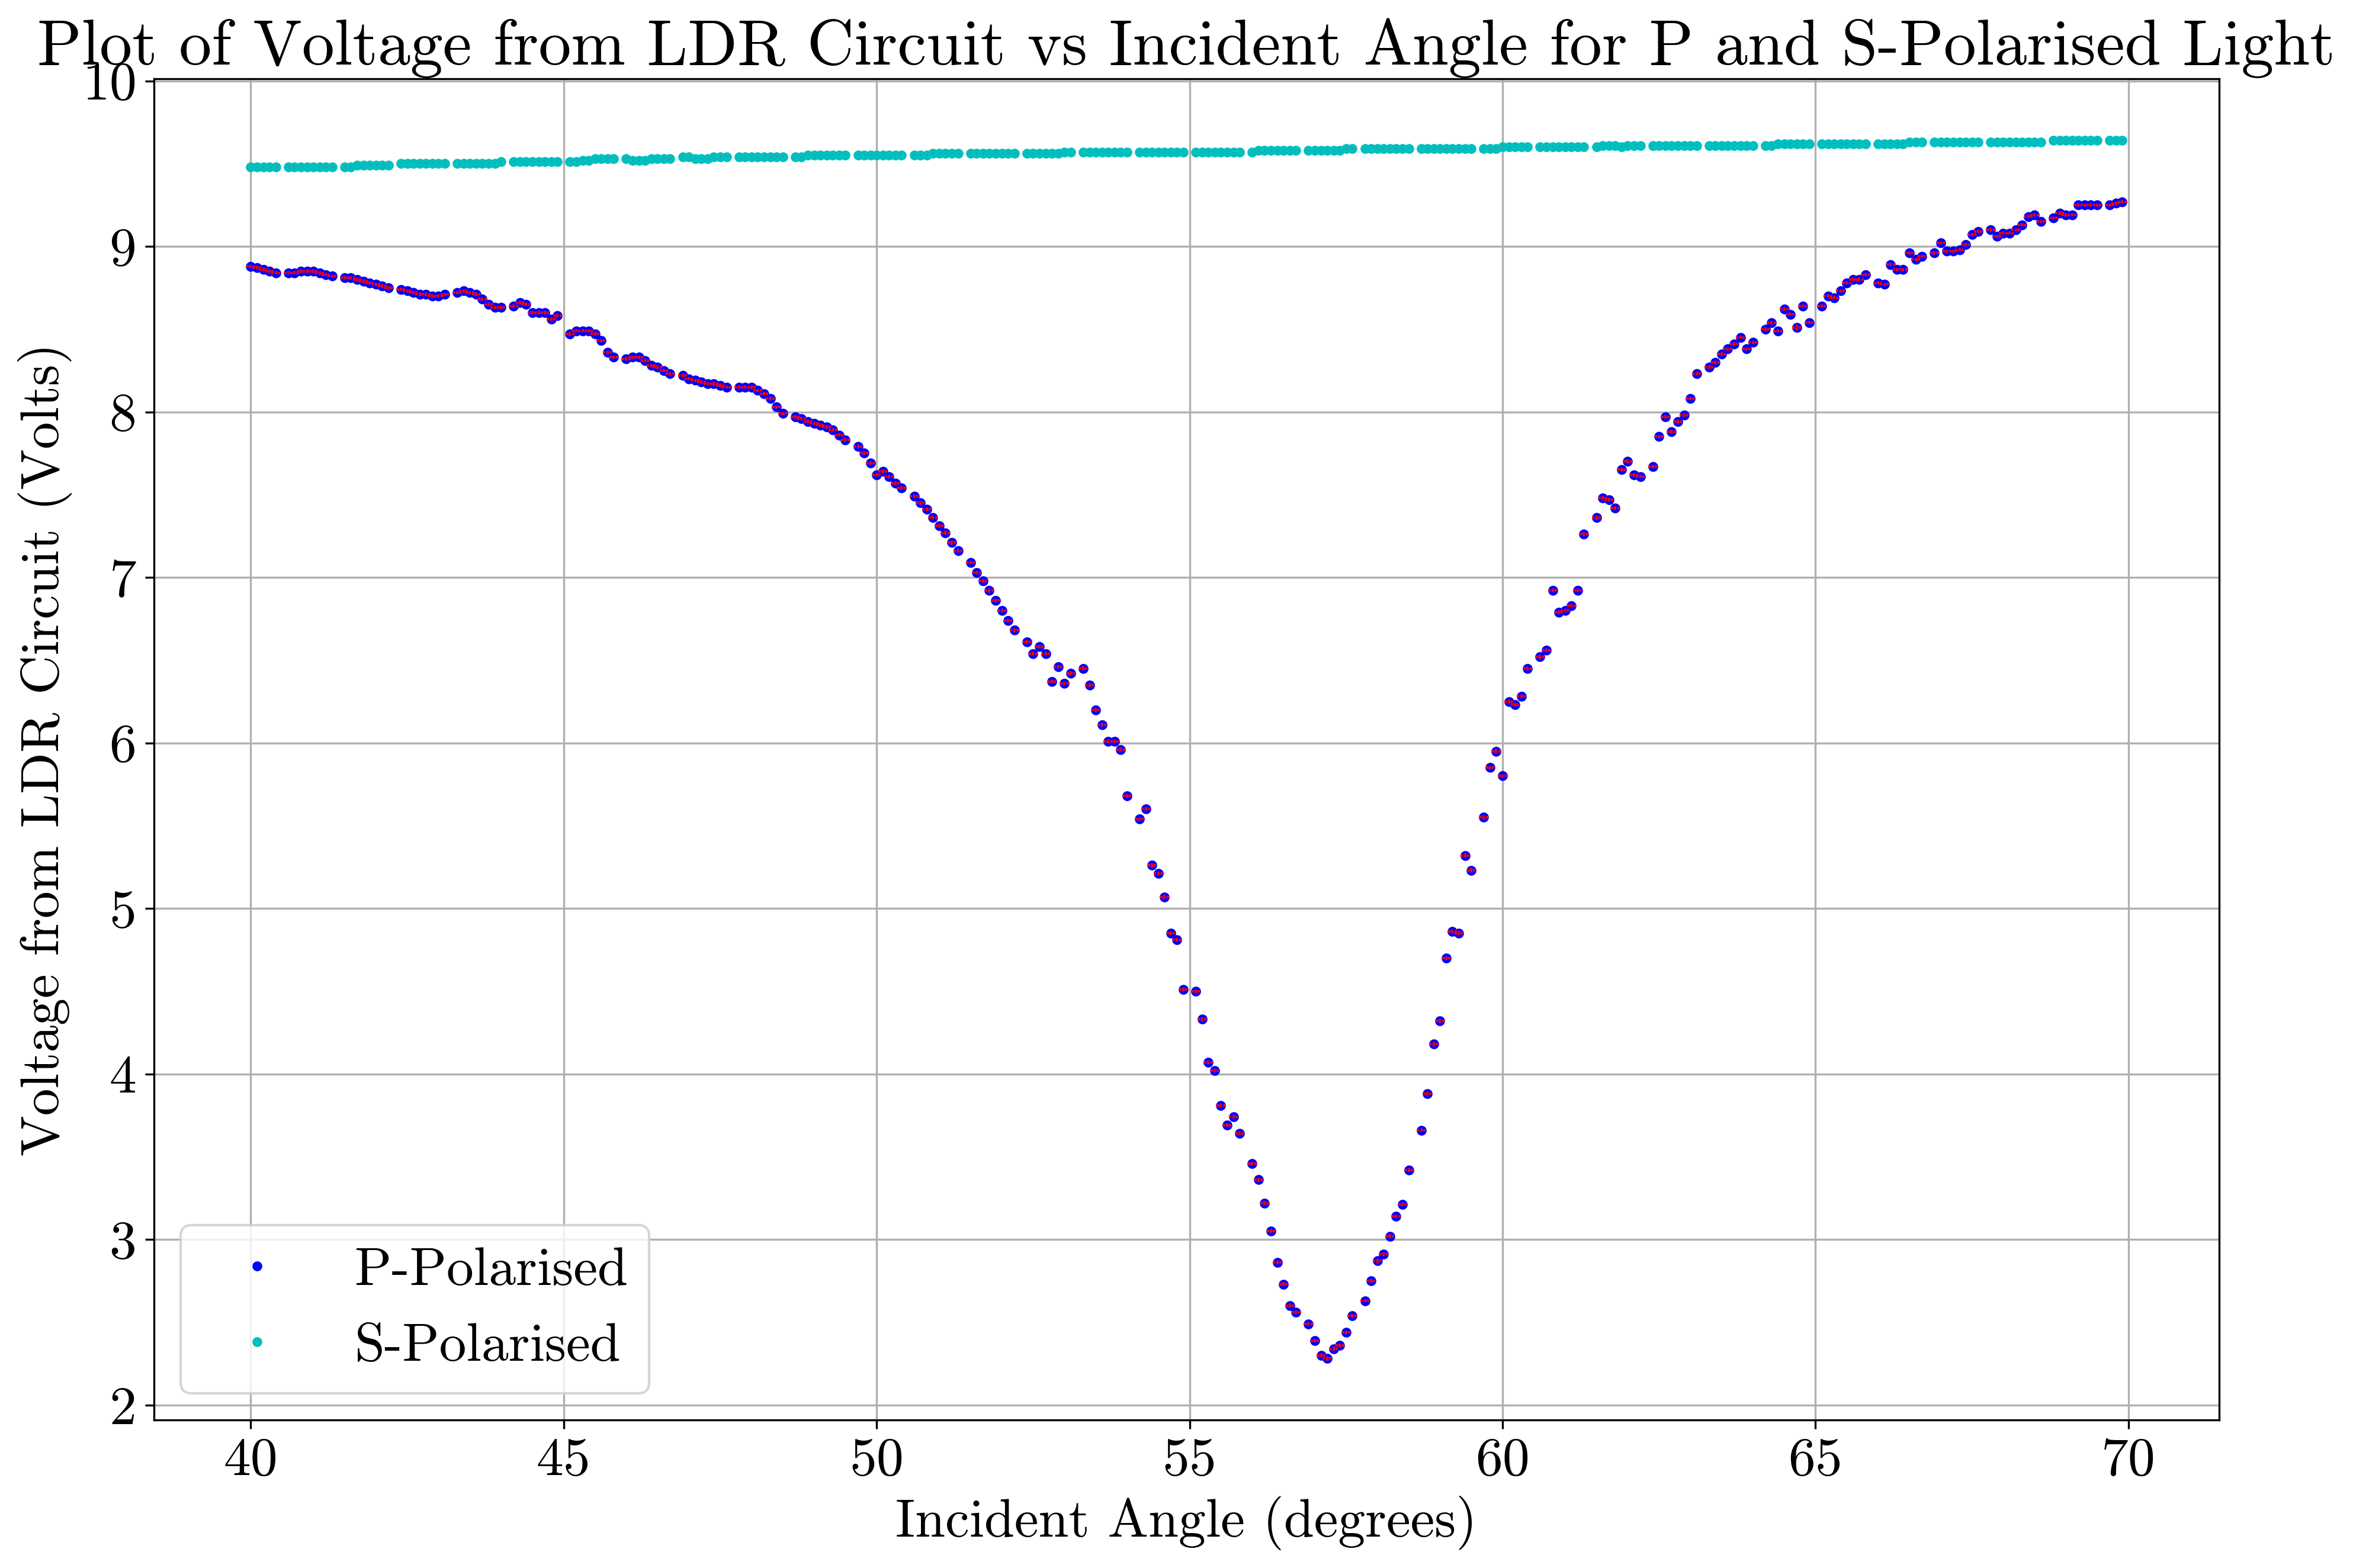

In [3]:
# Plotting data

plt.title("Plot of Voltage from LDR Circuit vs Incident Angle for P and S-Polarised Light")
plt.xlabel("Incident Angle (degrees)")
plt.ylabel("Voltage from LDR Circuit (Volts)")
plt.grid()

plt.plot(IncidentPP, VoltagePP, '.b', label="P-Polarised")
plt.errorbar(IncidentPP, VoltagePP, xerr=0.05, yerr=DeviationPP,fmt=',r', capsize=0.5)

plt.plot(IncidentSP, VoltageSP,'.c', label="S-Polarised")
plt.errorbar(IncidentSP, VoltageSP, yerr=DeviationSP,fmt=',r', capsize=0.5)

plt.legend()
plt.savefig('images/exercise1.png', bbox_inches='tight', dpi  = 600)

In [21]:
# Finding index of minimum voltage
print(np.where(VoltagePP==VoltagePP.min()))
print(f"Brewster's angle for P-Polarised light is {IncidentPP[153]}+/-0.05 degrees")

(array([153], dtype=int64),)
Brewster's angle for P-Polarised light is 57.2+/-0.05 degrees


In [20]:
# Finding refractive index and uncertainty
brewster_degree = ufloat(IncidentPP[153], 0.05)
brewster_radian = brewster_degree*(2*np.pi)/360

print(f"The refractive index of the glass is therefore {umath.tan(brewster_radian)}")

The refractive index of the glass is therefore 1.5517+/-0.0030


In [6]:
# Defining a function to calculate the internal angle, given the dimensions of the prism
def IntAngle(ExtAngle, A=np.pi/4, n=1.5517):
    return [umath.degrees(umath.asin(unp.radians(i)-A))/n+np.degrees(A) for i in ExtAngle]
A=np.pi/4
n=ufloat(1.5517,0.0030)

In [7]:
# Incorporating all five data sets

MeanAngleRed1 = (AngleRed1+AngleRed2+AngleRed3+AngleRed4+AngleRed5)/5
MeanUAngleRed1 = unp.uarray(MeanAngleRed1,np.full(267, 0.05))
MeanIntAngleRed1 = IntAngle(MeanUAngleRed1)
MeanVoltageRed1 = (VoltageRed1+VoltageRed2+VoltageRed3+VoltageRed4+VoltageRed5)/5

# Since we assume the 100 values used to find the mean and standard deviation are normally distributed (they're physical measurements), we can find the standard deviation of the set of all 500 measurements by adding the variances and sqrting.
MeanDeviationRed = np.sqrt(DeviationRed1**2+DeviationRed2**2+DeviationRed3**2+DeviationRed4**2+DeviationRed5**2)
# print(MeanVoltageRed,MeanDeviationRed)
MeanUVoltageRed1 = unp.uarray(MeanVoltageRed1,MeanDeviationRed)

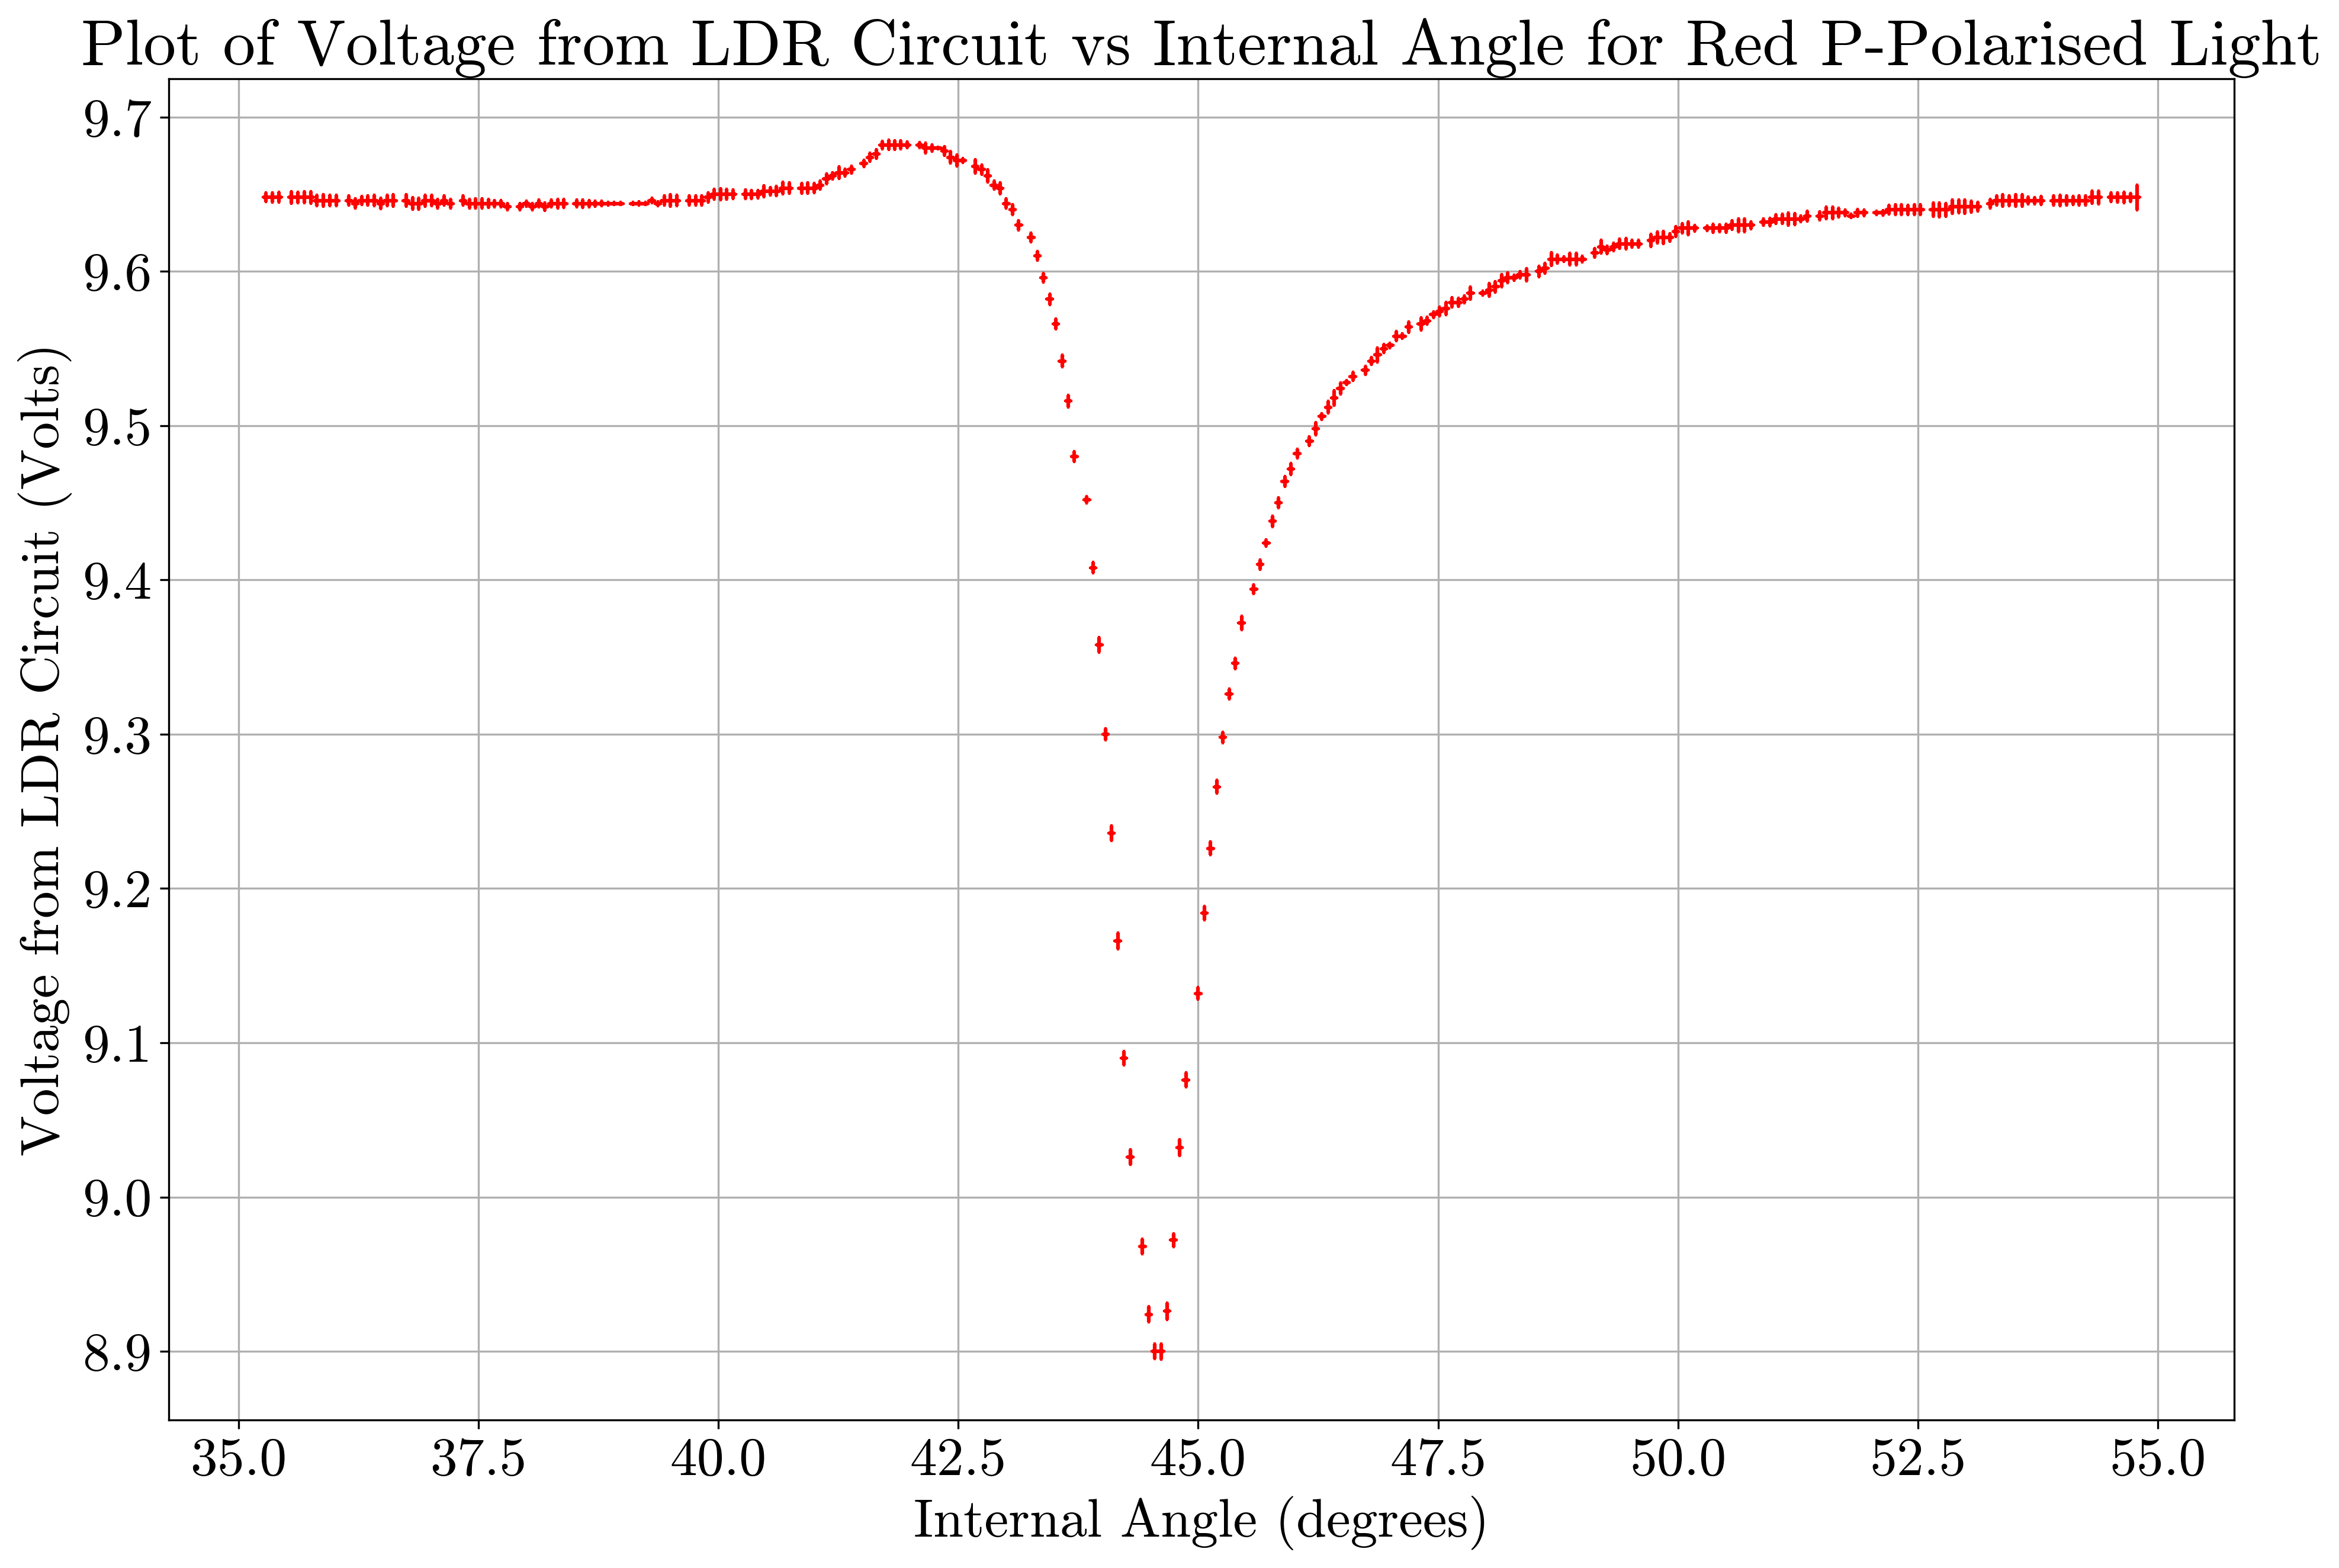

In [8]:
# Plotting with propagated uncertainty error bars

plt.title("Plot of Voltage from LDR Circuit vs Internal Angle for Red P-Polarised Light")
plt.xlabel("Internal Angle (degrees)")
plt.ylabel("Voltage from LDR Circuit (Volts)")
plt.grid()

plt.plot(unp.nominal_values(MeanIntAngleRed1),unp.nominal_values(MeanUVoltageRed1),',b')
plt.errorbar(unp.nominal_values(MeanIntAngleRed1),unp.nominal_values(MeanUVoltageRed1), xerr=unp.std_devs(MeanIntAngleRed1), yerr=unp.std_devs(MeanUVoltageRed1), fmt=',r', capsize=0.5)
plt.savefig('images/exercise2.png', bbox_inches='tight', dpi  = 600)

In [9]:
# Incorporating all five data sets

MeanAngleBlue1 = (AngleBlue1+AngleBlue2+AngleBlue3+AngleBlue4+AngleBlue5)/5
MeanUAngleBlue1 = unp.uarray(MeanAngleBlue1,np.full(356, 0.05))
MeanIntAngleBlue1 = IntAngle(MeanUAngleBlue1)
MeanVoltageBlue1 = (VoltageBlue1+VoltageBlue2+VoltageBlue3+VoltageBlue4+VoltageBlue5)/5

# Since we assume the 100 values used to find the mean and standard deviation are normally distributed (they're physical measurements), we can find the standard deviation of the set of all 500 measurements by adding the variances and sqrting.
MeanDeviationBlue = np.sqrt(DeviationBlue1**2+DeviationBlue2**2+DeviationBlue3**2+DeviationBlue4**2+DeviationBlue5**2)
# print(MeanVoltageBlue,MeanDeviationBlue)
MeanUVoltageBlue1 = unp.uarray(MeanVoltageBlue1,MeanDeviationBlue)

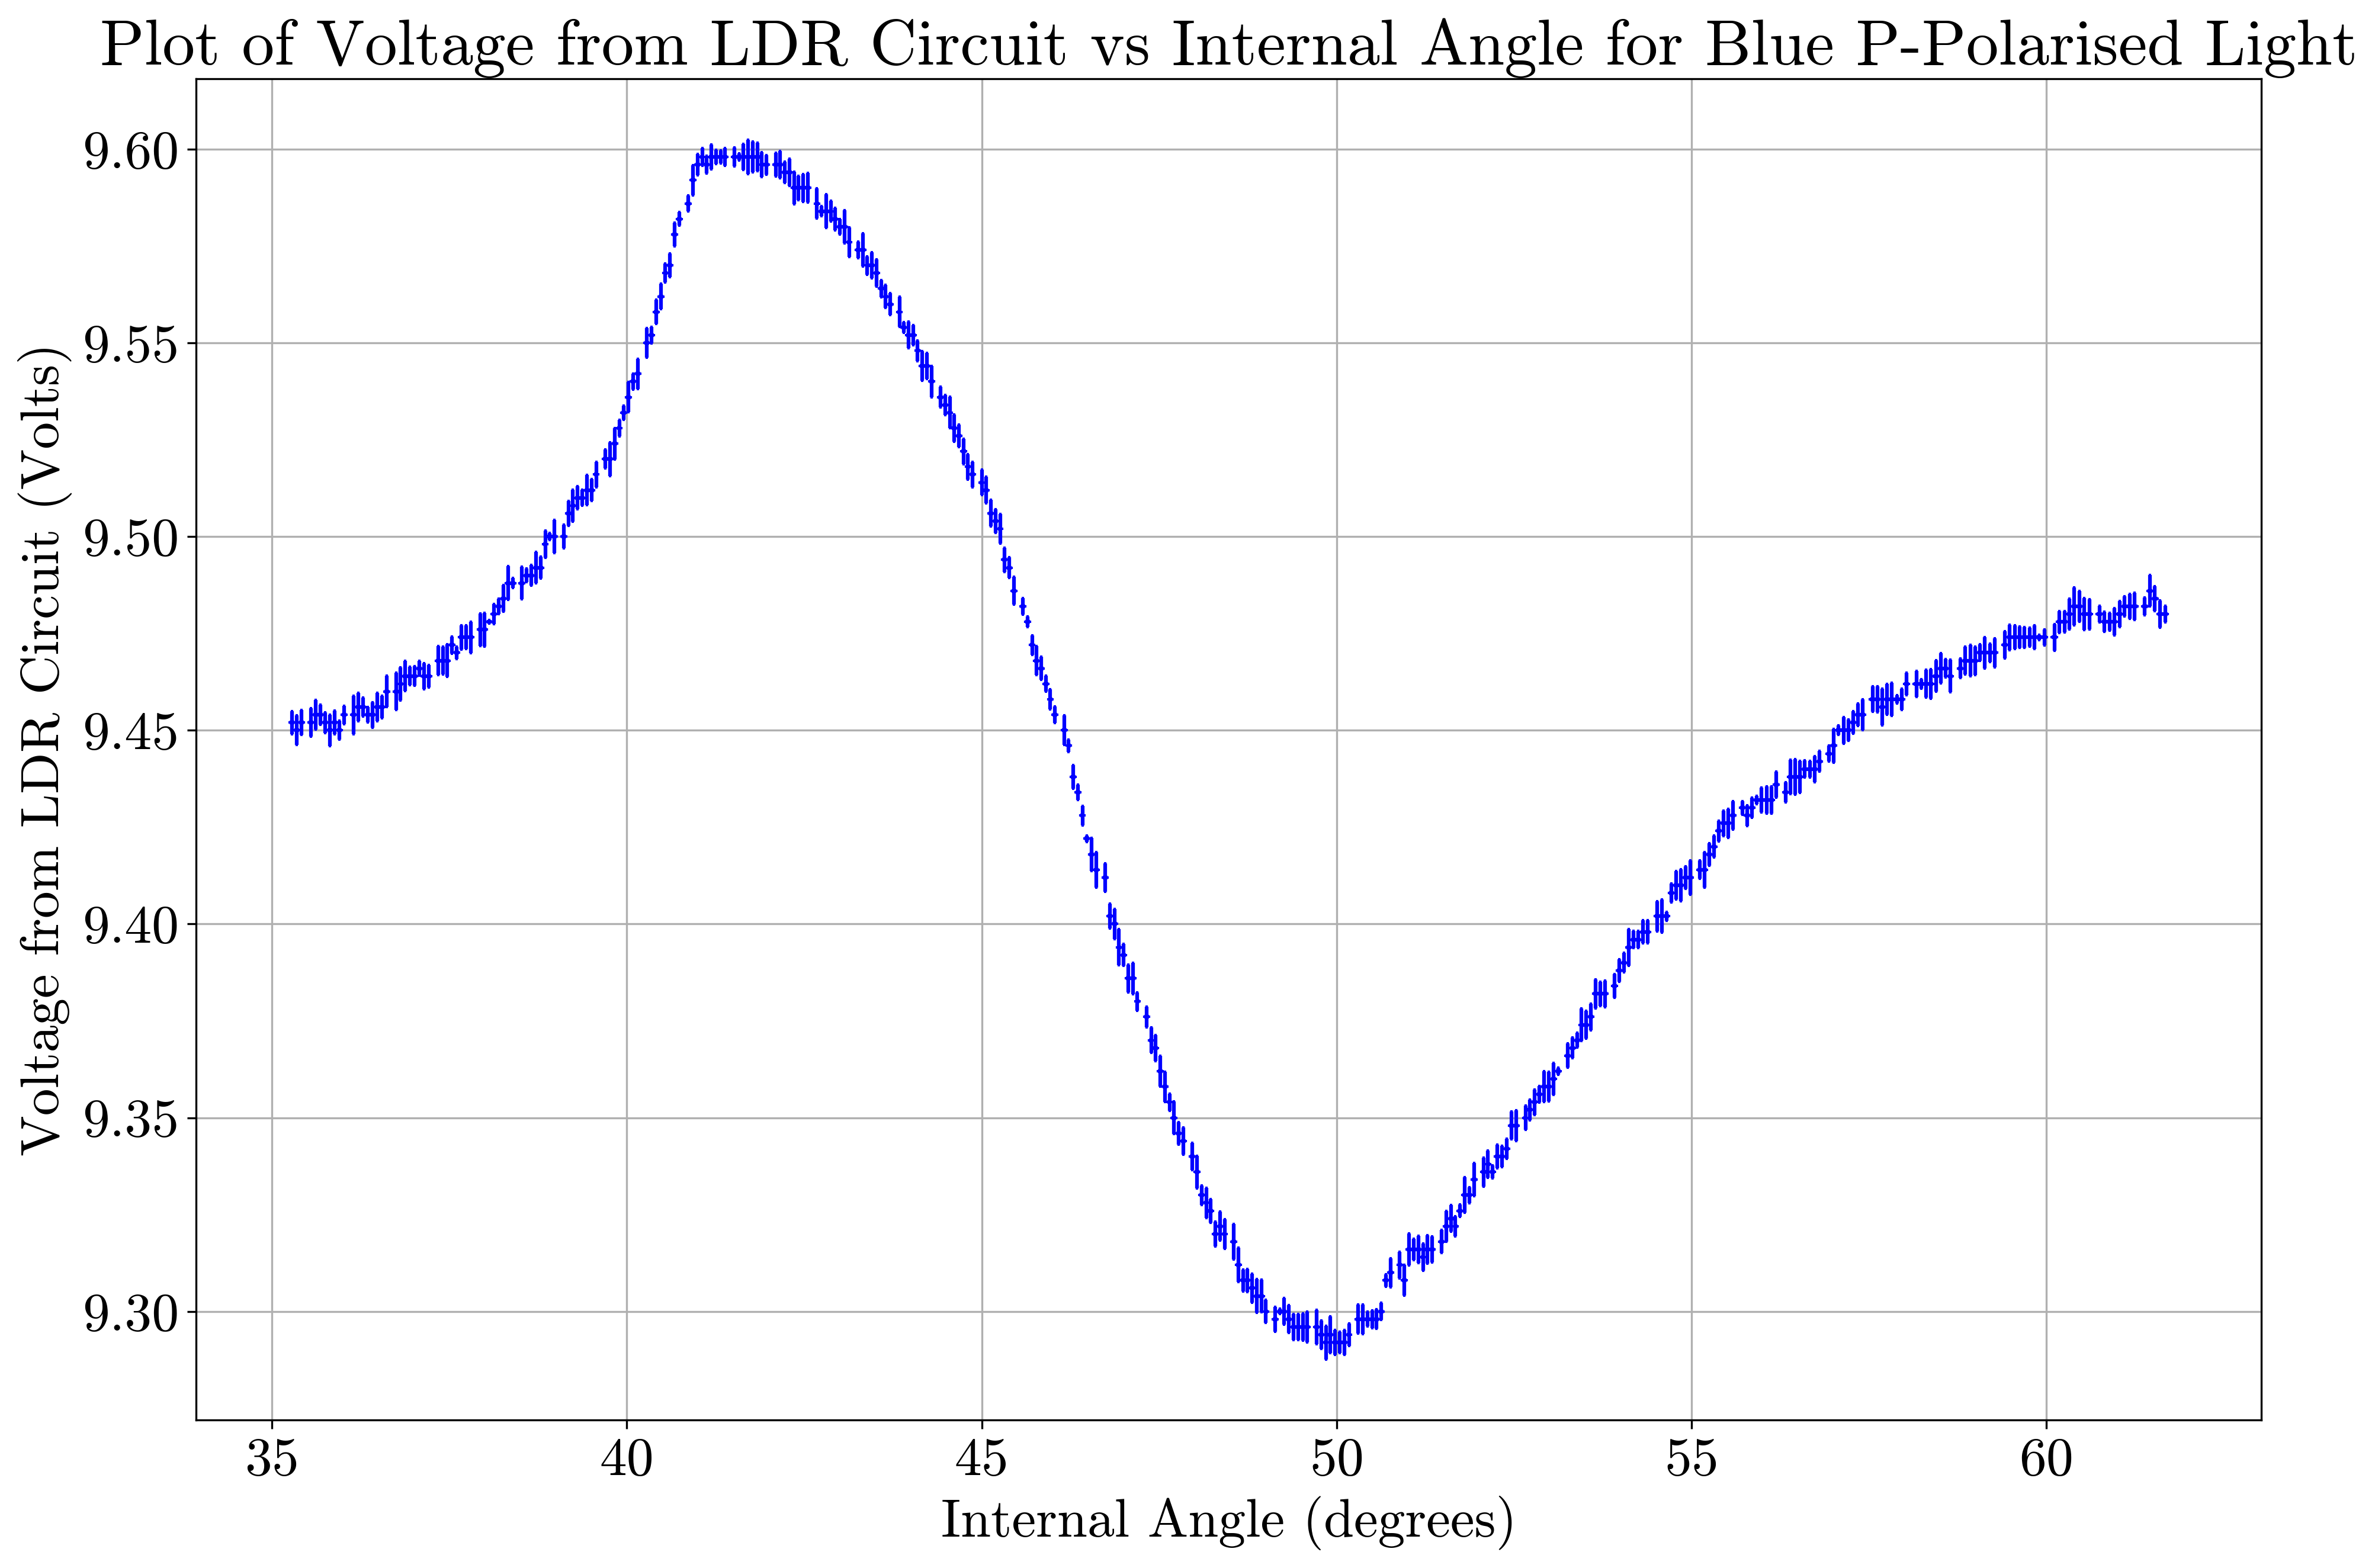

In [10]:
# Plotting with propagated uncertainty error bars

plt.title("Plot of Voltage from LDR Circuit vs Internal Angle for Blue P-Polarised Light")
plt.xlabel("Internal Angle (degrees)")
plt.ylabel("Voltage from LDR Circuit (Volts)")
plt.grid()

plt.plot(unp.nominal_values(MeanIntAngleBlue1),unp.nominal_values(MeanUVoltageBlue1),',r')
plt.errorbar(unp.nominal_values(MeanIntAngleBlue1),unp.nominal_values(MeanUVoltageBlue1), xerr=unp.std_devs(MeanIntAngleBlue1), yerr=unp.std_devs(MeanUVoltageBlue1), fmt=',b', capsize=0.5)
plt.savefig('images/exercise4.png', bbox_inches='tight', dpi  = 600)

In [11]:
# Finding the minimum voltages

print(np.where(unp.nominal_values(MeanUVoltageRed1)==unp.nominal_values(MeanUVoltageRed1).min()))
SPRRed = MeanIntAngleRed1[140]
print(f'SPR is at a maximum for the red light at an internal angle of {SPRRed:.2f} degrees.')

print(np.where(unp.nominal_values(MeanUVoltageBlue1)==unp.nominal_values(MeanUVoltageBlue1).min()))
SPRBlue = (MeanIntAngleBlue1[152]+MeanIntAngleBlue1[153]+MeanIntAngleBlue1[154]+MeanIntAngleBlue1[156])/4
print(f'SPR is at a maximum for the blue light at an internal angle of {SPRBlue:.2f} degrees.')

(array([140], dtype=int64),)
SPR is at a maximum for the red light at an internal angle of 44.55+/-0.03 degrees.
(array([152, 153, 154, 156], dtype=int64),)
SPR is at a maximum for the blue light at an internal angle of 49.99+/-0.02 degrees.


Pseudo-Code for gathering data:

In [ ]:
# Importing packages

from pydaqmx_helper.adc import ADC
from pydaqmx_helper.digital_io import Digital_IO
import pandas as pd
from time import sleep

myADC = ADC()

# Programming for the detecting of voltage from LDR generally (as a function)

myADC.addChannels([0,2], ADC_mode="DAQmx_Val_Diff") # initialising the channels 0 and 2 (connected to the LDR detection circuit)

channels = list(...) # list of channels interested in 0 for ground and 1 for AI 0 terminals
myADC.addchannels(channels, ADC_mode = 'DAQmx_Val_Diff', minRange = 0.0, maxRange =maxVoltage) # value for max voltage to determine range of possible readings

def takedata(run_number):
    readings = myADC.sampleVoltages(100,100) # recording the data into a dictionary. Taking 100 measurements at 100Hz
    results = pd.DataFrame(readings) # converting to pandas dataframe
    results.to_csv('dataFilename'+str(run_number)+'.csv') # writing and saving a csv file containing data

# Programming for the rotation of the table

# Initialising the output pins
myD_IOEnable = Digital_IO('0','output')
myD_IODirection = Digital_IO('1','output')
myD_IOMotor1 = Digital_IO('2','output')
myD_IOMotor2 = Digital_IO('3','output')

iteration_number = n # where n is the number of iterations the stepper motor must go through to scan through the range of interest

ans1 = myD_IOEnable.write(1)# sending a signal to enable both motors
sleep(0.001)
ans2 = myD_IODirection.write(1)# sending a signal to set the direction of the motors ('1' for clockwise, '0' for anticlockwise, as appropriate)
sleep(0.1)# delaying for 100ms
for i in range(iteration_number):# sending series of clock pulses (1s and 0s alternately) with an appropriate delay
    ans3 = myD_IOMotor1.write(1)
    ans4 = myD_IOMotor1.write(0)
    ans5 = myD_IOMotor2.write(1)
    ans6 = myD_IOMotor2.write(0)
    sleep(0.001)
    takedata(i)
ans7 = myD_IOEnable.write(0)# disabling motors